# 3.Model & ETC 

In [17]:
library(plot3Drgl)
library(nycflights13)

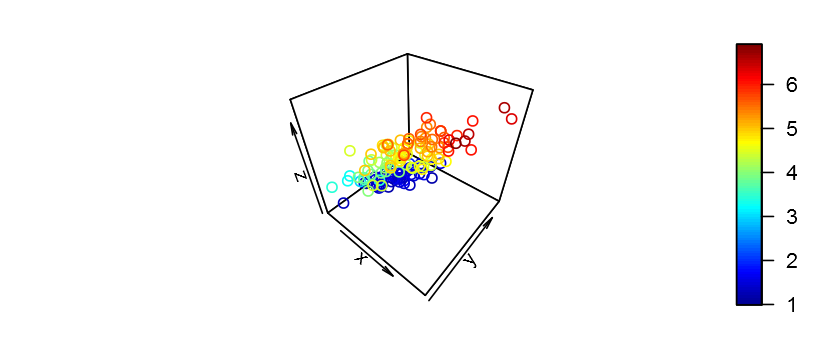

In [18]:
options(repr.plot.height=3)
points3D(iris$Sepal.Length,iris$Sepal.Width,iris$Petal.Length)

In [19]:
scatter3Drgl(iris$Sepal.Length,iris$Sepal.Width,iris$Petal.Length)

 <img src="src/0216/RD/4.PNG">

# Date - time 

In [20]:
library(tidyverse)
library(forcats)
library(lubridate)

In [21]:
month_levels <- c(
  "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
)

x1 <- c("Dec", "Apr", "Jan", "Mar")
x2 <- c("Dec", "Apr", "Jam", "Mar")

y1 <- factor(x1, levels = month_levels)

In [22]:
y1

[1] Dec Apr Jan Mar
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [23]:
ymd_hms("2017-01-31 20:11:59")

[1] "2017-01-31 20:11:59 UTC"

In [24]:
flights %>% select(year,month,day,hour, minute) %>% 
  mutate(departure = make_datetime(year,month,day,hour,minute)) %>% head(3)

  year month day hour minute           departure
1 2013     1   1    5     15 2013-01-01 05:15:00
2 2013     1   1    5     29 2013-01-01 05:29:00
3 2013     1   1    5     40 2013-01-01 05:40:00

In [25]:
make_datetime_100 <- function(year, month, day, time) {
  make_datetime(year, month, day, time %/% 100, time %% 100) # %/% 몫, %%나머지
}

In [26]:
flights_dt <- flights %>% 
  filter(!is.na(dep_time), !is.na(arr_time)) %>% 
  mutate(
    dep_time = make_datetime_100(year, month, day, dep_time),
    arr_time = make_datetime_100(year, month, day, arr_time),
    sched_dep_time = make_datetime_100(year, month, day, sched_dep_time),
    sched_arr_time = make_datetime_100(year, month, day, sched_arr_time)
  ) %>% 
  select(origin, dest, ends_with("delay"), ends_with("time"))

In [27]:
head(flights_dt)

  origin dest dep_delay arr_delay            dep_time      sched_dep_time
1    EWR  IAH         2        11 2013-01-01 05:17:00 2013-01-01 05:15:00
2    LGA  IAH         4        20 2013-01-01 05:33:00 2013-01-01 05:29:00
3    JFK  MIA         2        33 2013-01-01 05:42:00 2013-01-01 05:40:00
4    JFK  BQN        -1       -18 2013-01-01 05:44:00 2013-01-01 05:45:00
5    LGA  ATL        -6       -25 2013-01-01 05:54:00 2013-01-01 06:00:00
6    EWR  ORD        -4        12 2013-01-01 05:54:00 2013-01-01 05:58:00
             arr_time      sched_arr_time air_time
1 2013-01-01 08:30:00 2013-01-01 08:19:00      227
2 2013-01-01 08:50:00 2013-01-01 08:30:00      227
3 2013-01-01 09:23:00 2013-01-01 08:50:00      160
4 2013-01-01 10:04:00 2013-01-01 10:22:00      183
5 2013-01-01 08:12:00 2013-01-01 08:37:00      116
6 2013-01-01 07:40:00 2013-01-01 07:28:00      150

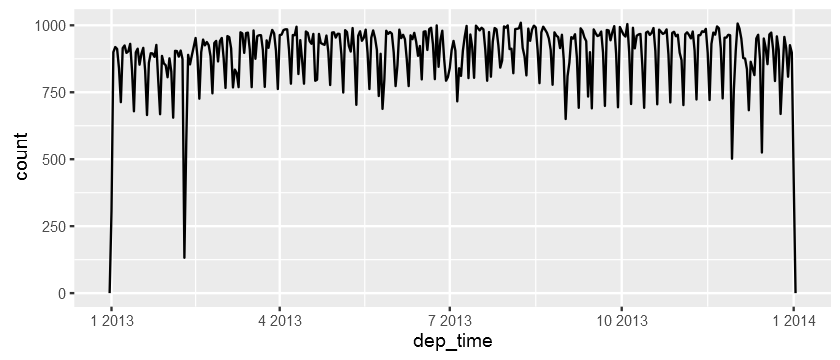

In [28]:
flights_dt %>% 
  ggplot(aes(dep_time)) + 
  geom_freqpoly(binwidth = 86400) # 86400 seconds = 1 day

 - histogram을 하게 된다면 보기가 어렵다 그래서 사용하는게 freqploy

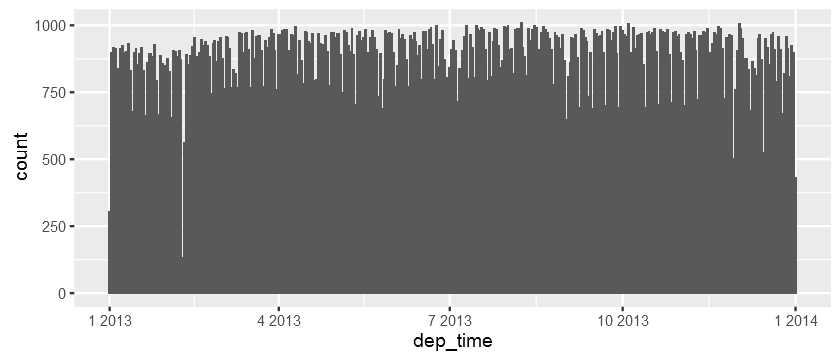

In [29]:
flights_dt %>% 
  ggplot(aes(dep_time)) + 
  geom_histogram(binwidth = 86400) # 86400 seconds = 1 day 보기 어렵다. 너무 백빽함.

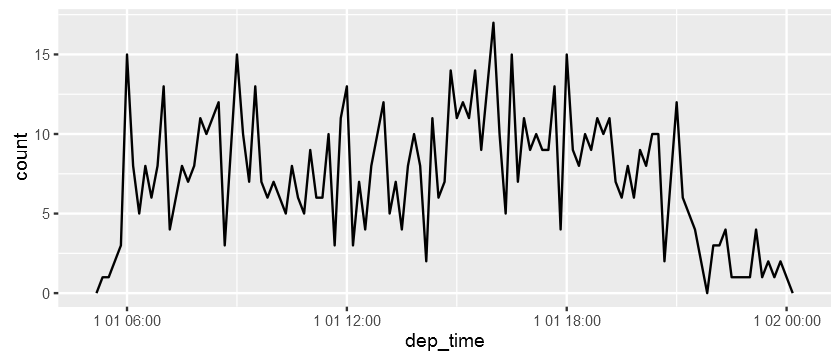

In [30]:
flights_dt %>% 
  filter(dep_time < ymd(20130102)) %>%  # filter 날짜.
  ggplot(aes(dep_time)) + 
  geom_freqpoly(binwidth = 600) # 600 s = 10 minutes

In [31]:
datetime <- today()

In [38]:
year(datetime)
month(datetime)
mday(datetime)
yday(datetime)
wday(datetime)
wday(datetime, label = TRUE, abbr = FALSE)

[1] 2017

[1] 1

[1] 22

[1] 22

[1] 1

[1] Sunday
7 Levels: Sunday < Monday < Tuesday < Wednesday < Thursday < ... < Saturday

In [37]:
data.frame(year=year(datetime),mon = month(datetime),mday = mday(datetime),yday = yday(datetime),wday = wday(datetime),wday_label = wday(datetime, label = TRUE, abbr = FALSE))

  year mon mday yday wday wday_label
1 2017   1   22   22    1     Sunday

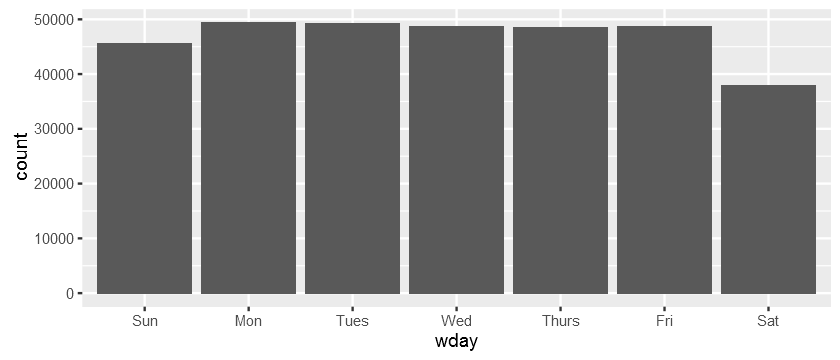

In [39]:
flights_dt %>% 
  mutate(wday = wday(dep_time, label = TRUE)) %>%  # 요일별 Count
  ggplot(aes(x = wday)) +
  geom_bar()


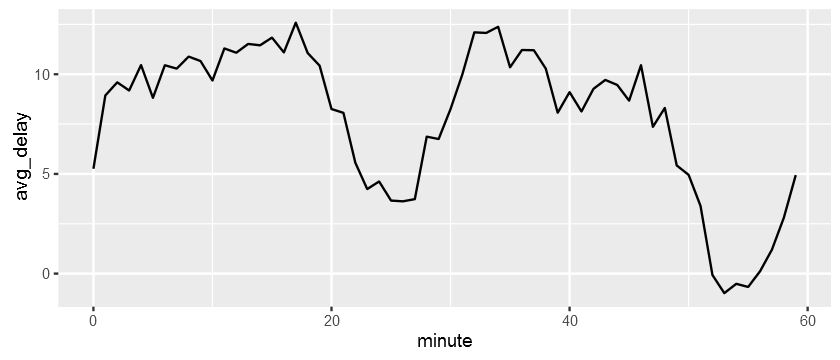

In [40]:
flights_dt %>% 
  mutate(minute = minute(dep_time)) %>% 
  group_by(minute) %>% 
  summarise( avg_delay = mean(arr_delay, na.rm = TRUE),n = n())  %>% 
  ggplot(aes(minute, avg_delay)) + geom_line()


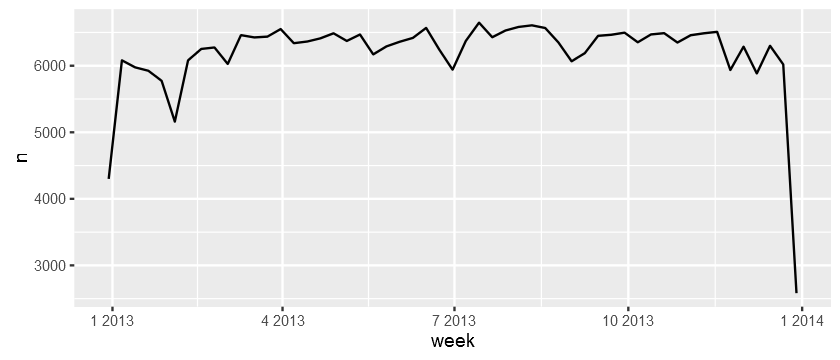

In [41]:
flights_dt %>% 
  count(week = floor_date(dep_time, "week")) %>% 
  ggplot(aes(week, n)) +
  geom_line()

# 4. MODEL

In [44]:
library(modelr)

In [43]:
head(sim1) # 예제 데이터.

,x,y
1,1.000000,4.199913
2,1.000000,7.510634
3,1.000000,2.125473
4,2.000000,8.988857
5,2.00000,10.24311
6,2.00000,11.29682


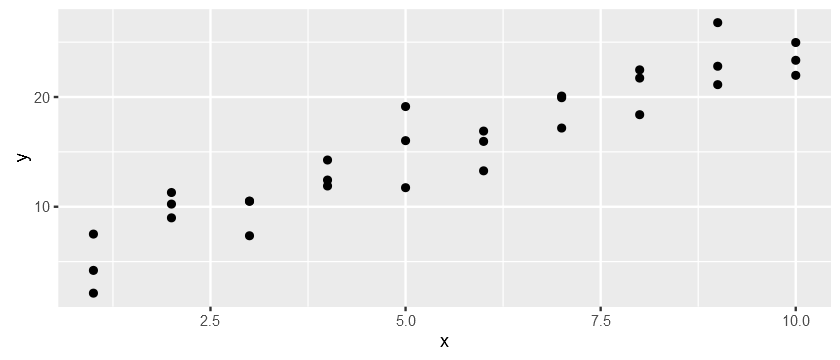

In [45]:
ggplot(sim1) +geom_point(aes(x,y)) 

 - r + uni form => 형태가 같은 1개의 숫자. 

In [46]:
models <- tibble(
  a1 = runif(250, -20, 40), # 난수를 생성, 250개를 -20~40까지. runif 일정구간에서 나올 확률이 동일.
  a2 = runif(250, -5, 5)
)

In [47]:
head(models)

,a1,a2
1,2.4909946,-0.1520822
2,5.647426,-3.573145
3,13.658123,2.574927
4,5.678507,1.741036
5,-9.090020,1.010728
6,37.9715449,0.3549744


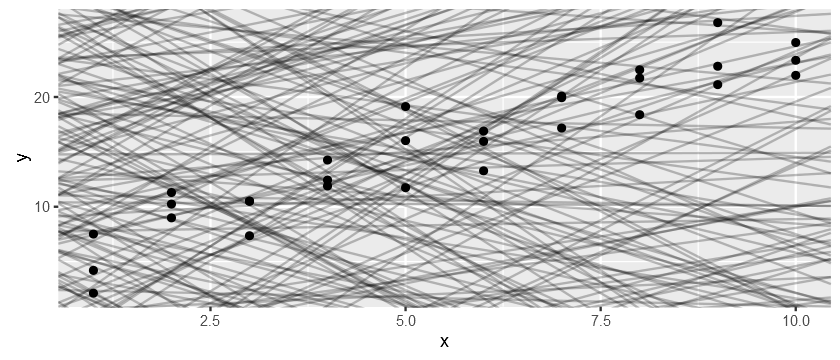

In [48]:
ggplot(sim1, aes(x,y)) + 
  geom_abline(aes(intercept=a1, slope=a2),data=models, alpha =.25) +  # abline은 절편과 기울기를 주면 해당 그림을 그린다. 
  geom_point()

# 회귀식 
 - SSE = sum of square error    1/n * sse = MSE (mean of Square Erros) => var (분산)
 <img src="3.PNG" width = 700>

In [49]:
model1 <- function(a, data) {
  a[1] + data$x * a[2]
}

In [50]:
model1(c(7, 1.5), sim1)

[1]  8.5  8.5  8.5 10.0 10.0 10.0 11.5 11.5 11.5 13.0 13.0 13.0 14.5 14.5 14.5
[16] 16.0 16.0 16.0 17.5 17.5 17.5 19.0 19.0 19.0 20.5 20.5 20.5 22.0 22.0 22.0

In [51]:
measure_distance <- function(mod, data) {
  diff <- data$y - model1(mod, data)
  sqrt(mean(diff ^ 2))
}

### RMSE => Route Mean of Square Errors = SD 

In [52]:
measure_distance(c(7,1.5), sim1) # RMSE => Route Mean of Square Errors = SD 
# 절편 : 7, 기울기:1.5

[1] 2.665212

In [53]:
measure_distance(c(mean(sim1$y),0), sim1) # 표준편차 

[1] 6.265114

In [54]:
sd(sim1$y)

[1] 6.372218

In [55]:
sim1_dist <- function(a1, a2) {
  measure_distance(c(a1, a2), sim1)
}

In [56]:
map_dbl(c(1,2,3),sqrt) # 각각에 적요해서 Vector로 출력

[1] 1.000000 1.414214 1.732051

In [57]:
map2_dbl(c(1,2,3),c(4,5,6),function(x,y){x+y}) #인자를 2개를 받는다. 짝을 지어서 

[1] 5 7 9

In [58]:
models <- models %>% 
  mutate(dist = purrr::map2_dbl(a1, a2, sim1_dist))

In [59]:
head(models)

,a1,a2,dist
1,2.4909946,-0.1520822,15.3754676
2,5.647426,-3.573145,33.709386
3,13.658123,2.574927,12.588574
4,5.678507,1.741036,2.321002
5,-9.090020,1.010728,19.385759
6,37.9715449,0.3549744,24.9918893


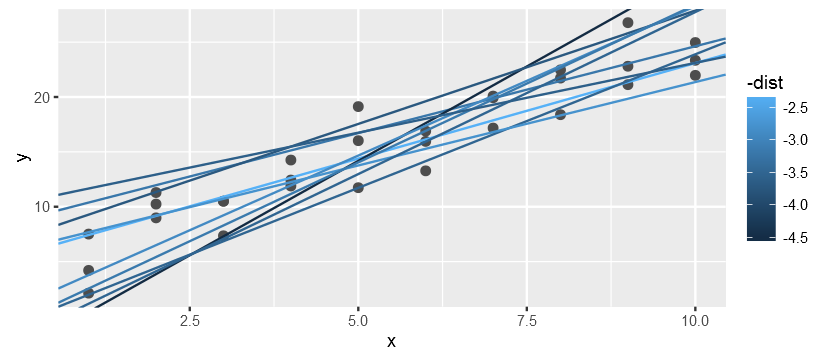

In [60]:
ggplot(sim1, aes(x, y)) + 
  geom_point(size = 2, colour = "grey30") + 
  geom_abline(
    aes(intercept = a1, slope = a2, colour = -dist), # 거리가 가까울수록 연한 그래프 
    data = filter(models, rank(dist) <= 10)
  )

 - 위와 동일한 방법 

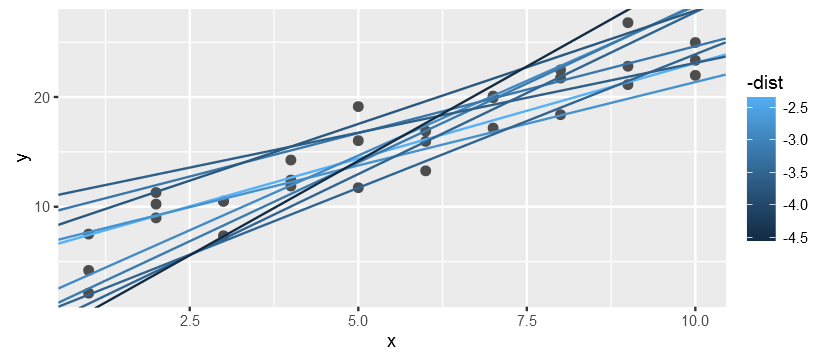

In [61]:
ggplot(sim1, aes(x, y)) + 
  geom_point(size = 2, colour = "grey30") + 
  geom_abline(
    aes(intercept = a1, slope = a2, colour = -dist), 
    data = models %>% arrange(dist) %>% head(10)
  )

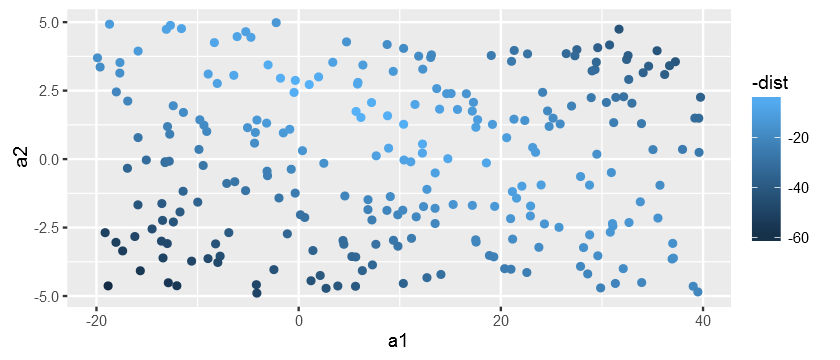

In [63]:
ggplot(models) + 
  geom_point(aes(a1,a2, color = -dist)) # 색이 연할 수록 거리가 가깝다. 즉, 그래프가 그쪽으로 간다. 

### 나만의 모델을 만들기 위해서는 optim을 사용하면 된다. 
 - 원해는 내용을 measure_distance에 다른 함수를 만들어 내면된다.

In [65]:
best <- optim(c(0,0), measure_distance,data=sim1) # c(0,0) :Initial values for the parameters to be optimized over.
best$par

[1] 4.222248 2.051204

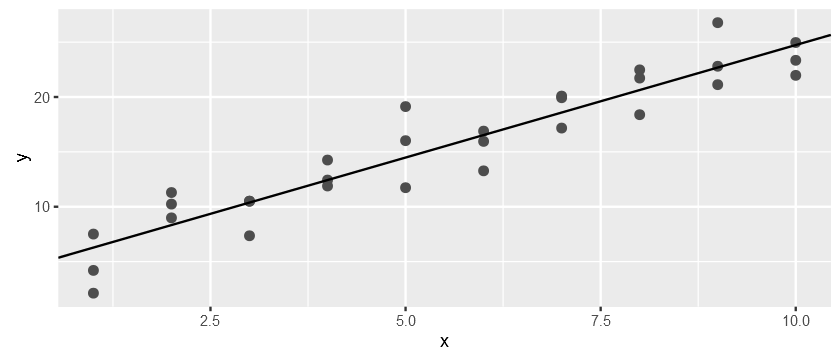

In [66]:
ggplot(sim1, aes(x, y)) + 
  geom_point(size = 2, colour = "grey30") + 
  geom_abline(intercept = best$par[1], slope = best$par[2]) # 기울기가 best$par[2]   절편 : best$par[1]

In [67]:
lm(y~x, sim1)


Call:
lm(formula = y ~ x, data = sim1)

Coefficients:
(Intercept)            x  
      4.221        2.052  


# GD 에서 Local Minimum에서 나오는 법
 1. 시작 위치를 여러군대로 해본다.
 2. 시뮬레이티드 애밀링? -> 철을 담금질? 하듯이 식혔다 높혔다 식혔다. 식으로 하게된다면 올라가기도 하고 내려가기도 하고 그러다가 온도를 식히게 되면 Global적으로 내려간다. 모인다. 

### 모델이 랜덤적으로 만들어지기 때문에 잘나온 결과물은 꼭 저장해놔야한다. 
 - 선형 회귀 lm

In [68]:
names(diamonds)
model <- lm(price ~ carat, diamonds)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [69]:
summary(model)


Call:
lm(formula = price ~ carat, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-18585.3   -804.8    -18.9    537.4  12731.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2256.36      13.06  -172.8   <2e-16 ***
carat        7756.43      14.07   551.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1549 on 53938 degrees of freedom
Multiple R-squared:  0.8493,	Adjusted R-squared:  0.8493 
F-statistic: 3.041e+05 on 1 and 53938 DF,  p-value: < 2.2e-16


 - Multiple R-squared:  0.8493 이 모형이 전체를 84% 설명한다. 
 - 전체분산 - 해당식의 분산 / 전체분산 = 84%
 - 해당 식의 분산은 16% (전체 비중)

### 회귀식에서 많이 쓰늑네 절편을 고정시키는 것이다. 
 - diamonds가 아주 작다고 하면 -2256 이면 돈을 받아야 한다. 말이 안된다. 해석이 말이 안됨. 

In [70]:
lm(price ~ 0 + carat, diamonds) %>% summary() # intercept 가 사라진다. / 절편 생략.


Call:
lm(formula = price ~ 0 + carat, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-10486.8  -1473.9  -1136.2   -674.9  12649.1 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
carat 5666.270      8.955   632.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1930 on 53939 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8813 
F-statistic: 4.004e+05 on 1 and 53939 DF,  p-value: < 2.2e-16


In [71]:
lm(price ~ carat + z, diamonds) %>% summary() # 케럿이 커지면서 z가 줄어야된다. 


Call:
lm(formula = price ~ carat + z, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-21323.9   -704.8    -12.8    423.4  31214.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   340.66      75.62   4.505 6.65e-06 ***
carat        9288.40      46.10 201.480  < 2e-16 ***
z           -1079.32      30.97 -34.856  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1531 on 53937 degrees of freedom
Multiple R-squared:  0.8526,	Adjusted R-squared:  0.8526 
F-statistic: 1.561e+05 on 2 and 53937 DF,  p-value: < 2.2e-16


### 선형적인 모양이 아니다. 확 올라가는 모양이다. 
 - 제곱을 사용해본다

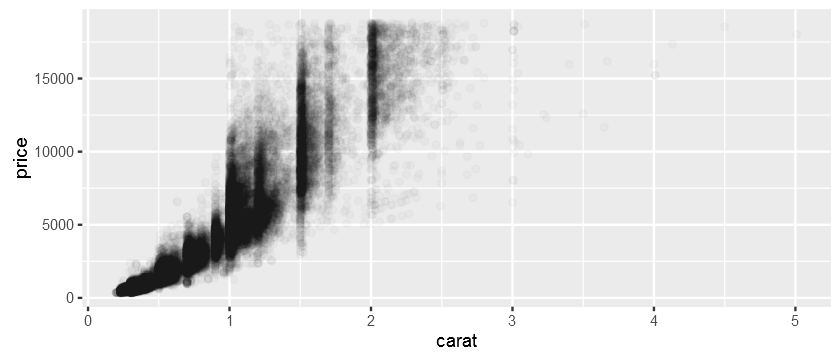

In [72]:
ggplot(diamonds) + geom_point(aes(carat,price), alpha=.02)

In [73]:
lm(price ~ carat ^2, diamonds) %>% summary() #  적용이 안된다. 


Call:
lm(formula = price ~ carat^2, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-18585.3   -804.8    -18.9    537.4  12731.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2256.36      13.06  -172.8   <2e-16 ***
carat        7756.43      14.07   551.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1549 on 53938 degrees of freedom
Multiple R-squared:  0.8493,	Adjusted R-squared:  0.8493 
F-statistic: 3.041e+05 on 1 and 53938 DF,  p-value: < 2.2e-16


 - I() 함수 적용. 

In [74]:
lm(price ~ I(carat^2) + carat + z, diamonds) %>% summary() #  I()를 사용하게 된다면 적용된다. 


Call:
lm(formula = price ~ I(carat^2) + carat + z, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-22762.2   -697.5    -16.8    412.7  28330.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   191.12      83.38   2.292   0.0219 *  
I(carat^2)    110.78      26.04   4.253 2.11e-05 ***
carat        8910.25     100.14  88.975  < 2e-16 ***
z            -978.76      38.96 -25.125  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1531 on 53936 degrees of freedom
Multiple R-squared:  0.8527,	Adjusted R-squared:  0.8527 
F-statistic: 1.041e+05 on 3 and 53936 DF,  p-value: < 2.2e-16


## 상호작용. 
 - Carat^2 가 안되는 이유 
 - lm에서 곱하기는 상호작용을 의미한다. carat^2 = carat * carat, 두개의 변수의 곱이 미치는 영향을 의미한다.
 - 곱을 표현하고 싶다면 변수:변수 로 표현한다. 
 - 상호작용 항이라고 한다. **a,b**의 상호작으로 보게 되면 a,b도 같이 들어간다, **a + b + a:b ** 이런식으로 
#### a + b + a:b => a*b가 된다. 

In [75]:
lm(price ~ carat + z + carat:z, diamonds) %>% summary() # 다변량 시간에 배운것 같다. 이제 이해가간다. 다시 보자 


Call:
lm(formula = price ~ carat + z + carat:z, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-25518.5   -649.9    -26.6    357.8  21350.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   550.26      75.94   7.246 4.34e-13 ***
carat        6728.23     128.34  52.427  < 2e-16 ***
z            -968.56      31.27 -30.976  < 2e-16 ***
carat:z       458.64      21.47  21.362  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1525 on 53936 degrees of freedom
Multiple R-squared:  0.8539,	Adjusted R-squared:  0.8539 
F-statistic: 1.051e+05 on 3 and 53936 DF,  p-value: < 2.2e-16


In [77]:
lm(price ~ carat * z, diamonds) %>% summary()


Call:
lm(formula = price ~ carat * z, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-25518.5   -649.9    -26.6    357.8  21350.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   550.26      75.94   7.246 4.34e-13 ***
carat        6728.23     128.34  52.427  < 2e-16 ***
z            -968.56      31.27 -30.976  < 2e-16 ***
carat:z       458.64      21.47  21.362  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1525 on 53936 degrees of freedom
Multiple R-squared:  0.8539,	Adjusted R-squared:  0.8539 
F-statistic: 1.051e+05 on 3 and 53936 DF,  p-value: < 2.2e-16


## 상호작용 2 
 - 소득, 성적 
  - 소득이 높다면 성적이 높다. 하지만 학교가 교육프로그램이 좋다면 소득이높다고 하더라도 성적이 완만하게 올라가는 경향이 있다고 치자. <br> 소득이 성적에 미치는 영향을 학교가 조절해준다. 이러한 **조절을 moderation**이라고 한다. 
 - 성적 ~ 소득 + 학교의영향:소득 
 - 성적 ~ a*소득 + b(학교의영향:소득) => (a+b학교영향):소득 
 - 성적은 a+b학교영향에 따라서 기울기가 달라진다. 즉, 학교의 영향에 따라서 기울기가 달라진다. 
 
## 상호작용을 언제 판단하고 적용해보는가?
 1. 이론적 배경지식을 활용한다. 
 2. 모든 상호작용을 다 집어넣고 lasso를 하게 된다면 컴퓨터가 통계적으로 판단해서 상호작용이 없을 경우 0 으로 바꿔버린다. 